In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# **Dataset 1:**

In [19]:
blobs = pd.read_csv('/content/sample_data/cluster-blobs.csv')
blobs.head()

,X1,X2
0,4.645333,6.822294
1,4.784032,6.422883
2,-5.851786,5.774331
3,-7.459592,6.456415
4,4.918911,6.961479


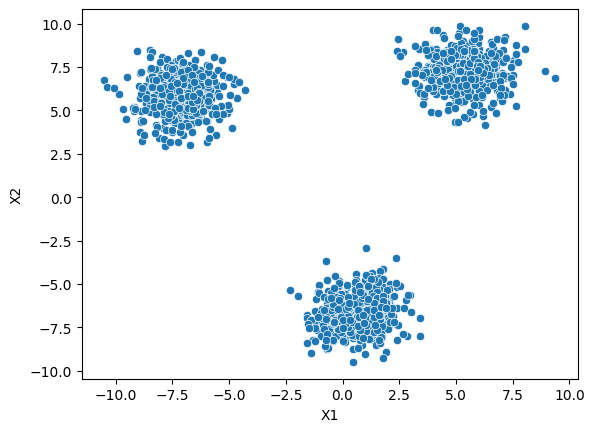

In [20]:
sns.scatterplot(x = 'X1', y = 'X2', data = blobs);

# **Dataset 2:**

In [10]:
circles = pd.read_csv('/content/sample_data/cluster-circles.csv')
circles.head()

,X1,X2
0,-0.348677,0.010157
1,-0.176587,-0.954283
2,0.301703,-0.113045
3,-0.782889,-0.719468
4,-0.733280,-0.757354


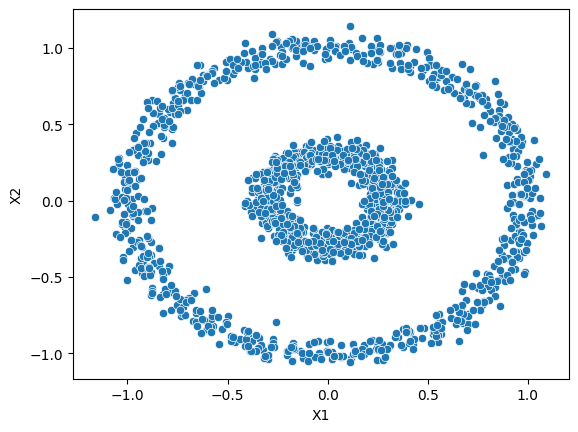

In [11]:
sns.scatterplot(x = 'X1', y = 'X2', data = circles);

# **Dataset 3:**

In [12]:
moons = pd.read_csv('/content/sample_data/cluster-moons.csv')
moons.head()

,X1,X2
0,0.674362,-0.444625
1,1.547129,-0.239796
2,1.601930,-0.230792
3,0.014563,0.449752
4,1.503476,-0.389164


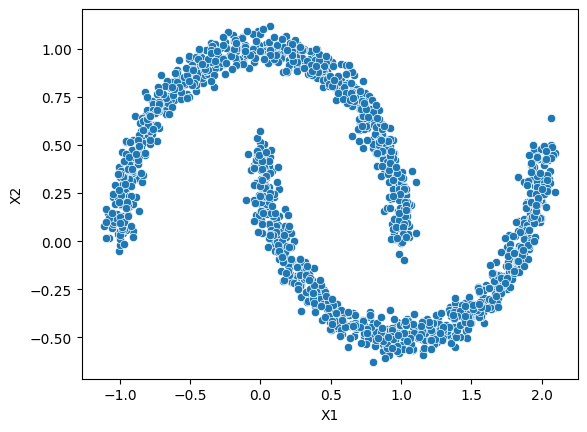

In [13]:
sns.scatterplot(x = 'X1', y = 'X2', data = moons);

In [22]:
def display_categories(model, data):

  cluster_labels = model.fit_predict(data)
  sns.scatterplot(x = 'X1', y = 'X2', data = data, hue =cluster_labels, palette = 'Set1');

# **Firstly apply Distance based K means clustering:**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


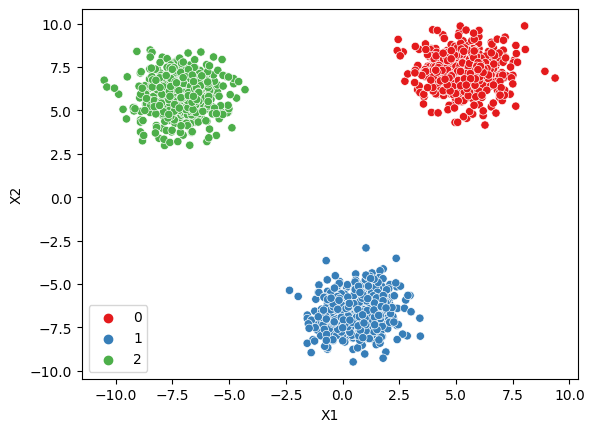

In [23]:
from sklearn.cluster import KMeans

model  = KMeans(n_clusters=3)
display_categories(model, blobs);

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


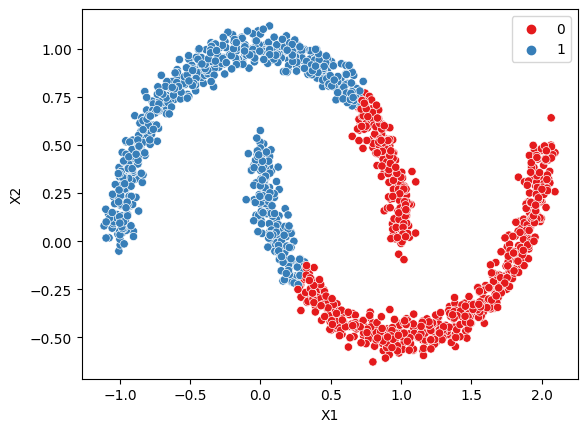

In [24]:
model  = KMeans(n_clusters=2)
display_categories(model, moons);

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


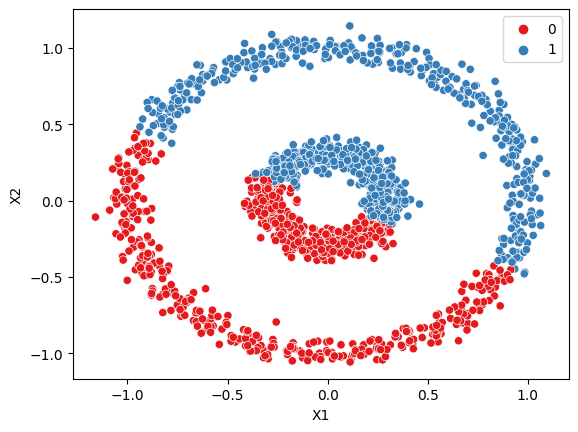

In [25]:
model  = KMeans(n_clusters=2)
display_categories(model, circles);

Such a poor performance.

# **Now apply Density based DBSCAN:**

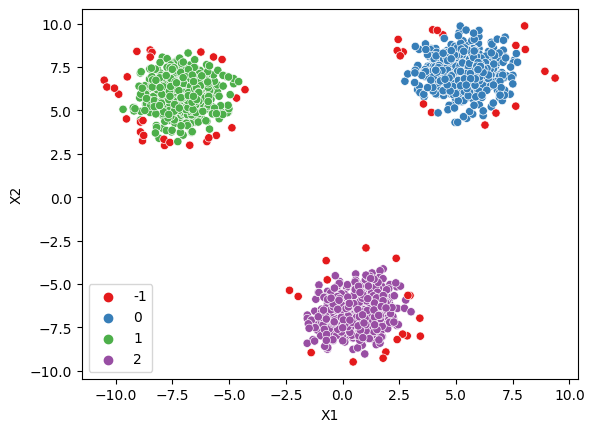

In [26]:
from sklearn.cluster import DBSCAN

model = DBSCAN()
display_categories(model, blobs);

Here the red ones dot, having -1 as index on Legend, are the outliers.

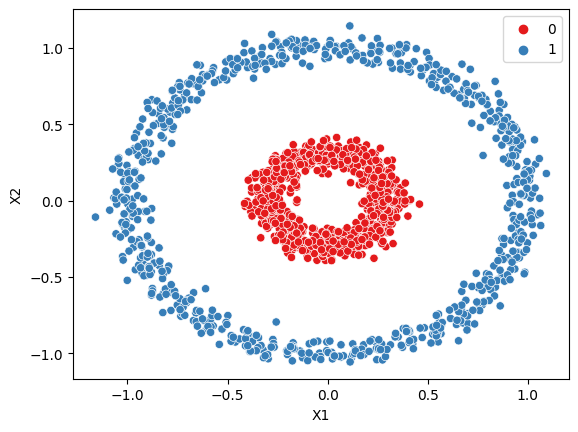

In [28]:
model = DBSCAN(eps=0.15);
display_categories(model, circles);

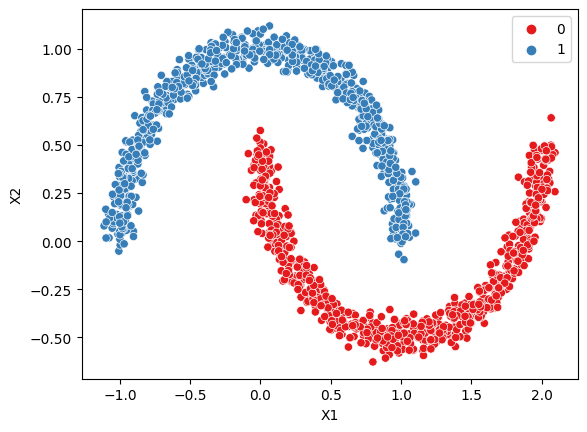

In [29]:
model = DBSCAN(eps=0.15);
display_categories(model, moons);

# **Hyperparameters Tuning:**

In [30]:
two_blobs = pd.read_csv('/content/sample_data/cluster-two-blobs.csv')
two_blobs.head()

,X1,X2
0,0.046733,1.765120
1,-8.994134,-6.508186
2,0.650539,1.264533
3,-9.501554,-6.736493
4,0.057050,0.188215


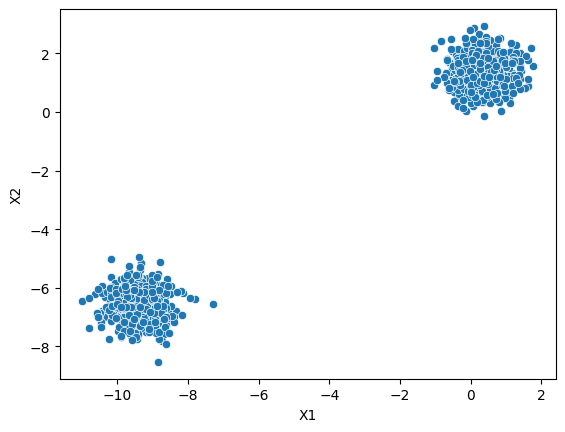

In [31]:
sns.scatterplot(x = 'X1', y = 'X2', data = two_blobs);

In [32]:
blobs_with_outliers = pd.read_csv('/content/sample_data/cluster-two-blobs-outliers.csv')
blobs_with_outliers.head()

,X1,X2
0,0.046733,1.765120
1,-8.994134,-6.508186
2,0.650539,1.264533
3,-9.501554,-6.736493
4,0.057050,0.188215


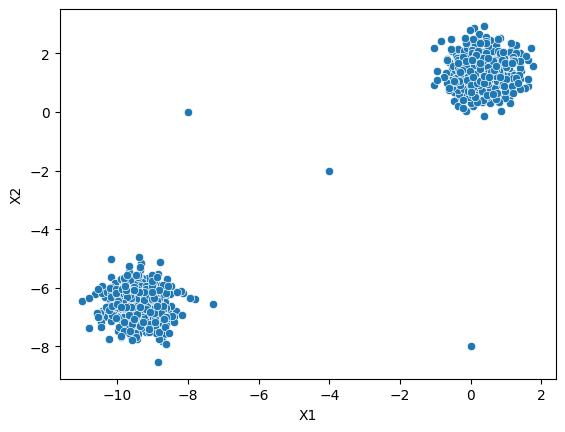

In [33]:
sns.scatterplot(x = 'X1', y = 'X2', data = blobs_with_outliers);

Using default values of DBSCAN eps = 0.5 and samples = 5:

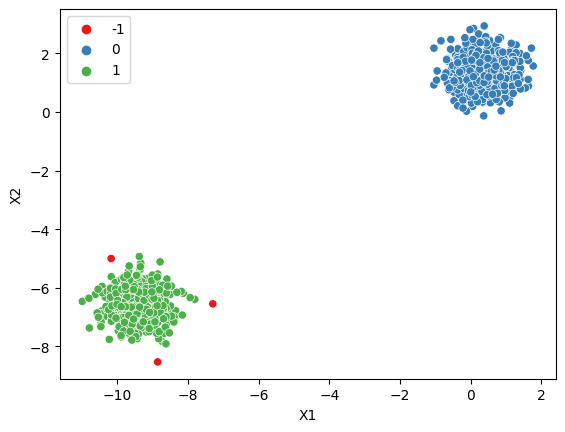

In [34]:
model = DBSCAN()
display_categories(model, two_blobs)

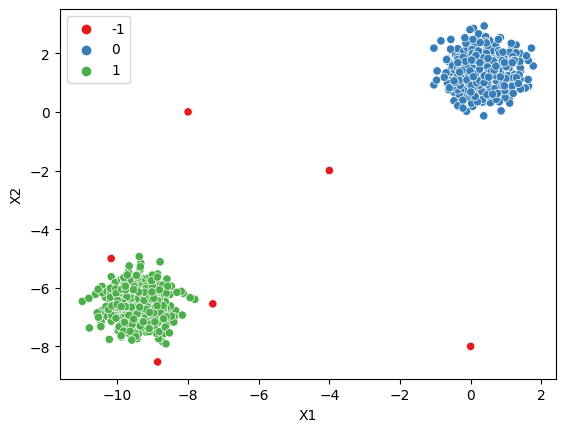

In [35]:
model = DBSCAN()
display_categories(model, blobs_with_outliers);

Good performance. Let's change hyperparameters a bit.

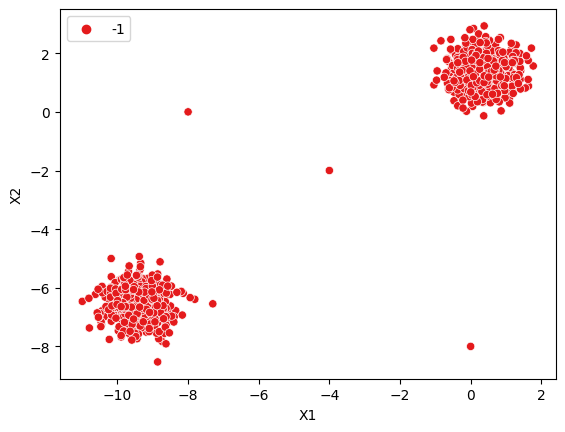

In [36]:
model = DBSCAN(eps = 0.001)
display_categories(model, blobs_with_outliers);

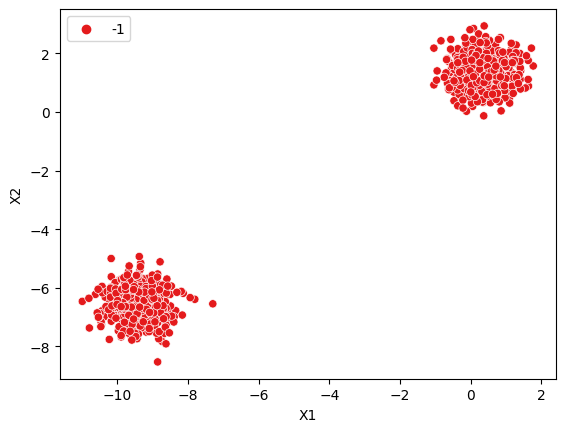

In [37]:
model = DBSCAN(eps = 0.001)
display_categories(model, two_blobs);

Ugh. It has selected everything as outlier. Wrong!!!

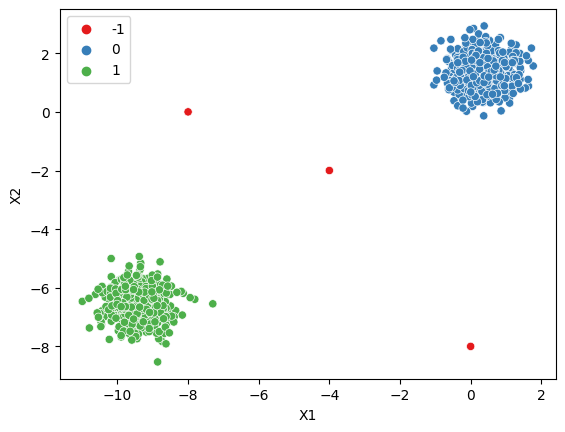

In [41]:
model = DBSCAN(eps = 1)
display_categories(model, blobs_with_outliers);

In [42]:
model.labels_

array([ 0,  1,  0, ..., -1, -1, -1])

Let's check how many outliers it has made.

In [43]:
np.sum(model.labels_ == -1)

3

Let's check what percentage of our total points we have outliers.

In [45]:
100 * np.sum(model.labels_ == -1) / len(model.labels_)

0.29910269192422734

So, it tells 0.29 = 0.3 means 3% points are outliers. As we also know that we have 1000 points we have. 3% are outlier.

In [46]:
len(model.labels_)

1003

Let's change hyperparameters and check their effect using elbow method.

In [47]:
num_of_outliers = []
outliers_percent = []

for eps in np.linspace(0.001, 10, 100):
  model = DBSCAN(eps=eps)
  model.fit(blobs_with_outliers)

  num_of_outliers.append(np.sum(model.labels_ == -1))

  outliers_percent.append(100 * np.sum(model.labels_ == -1) / len(model.labels_))

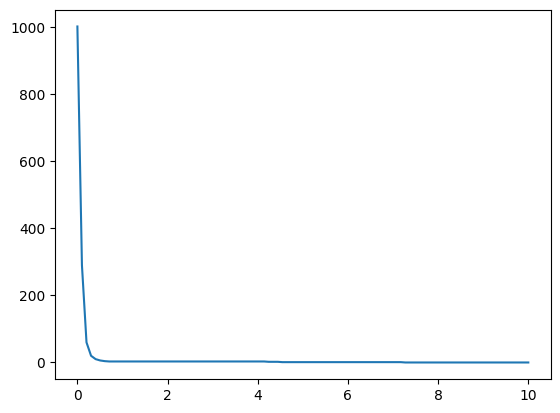

In [49]:
sns.lineplot(x = np.linspace(0.001, 10, 100), y = num_of_outliers);

To zoom out the plot:

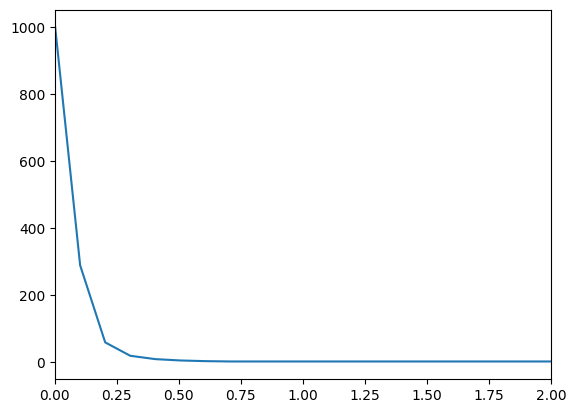

In [51]:
sns.lineplot(x = np.linspace(0.001, 10, 100), y = num_of_outliers);
plt.xlim(0,2);

It seems for all the later values it considered 0 outliers are there in dataset.

Lets confirm it this way: set y = 3 as we know we have maximum 3 outliers.

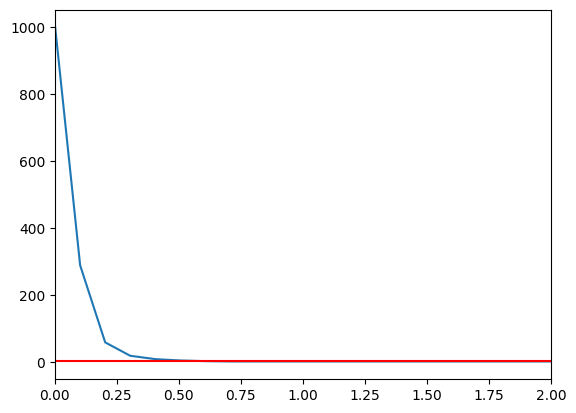

In [52]:
sns.lineplot(x = np.linspace(0.001, 10, 100), y = num_of_outliers);
plt.xlim(0,2);

# draw a horizontal line: hline
plt.hlines(y = 3, xmin = 0, xmax = 2.00, color = 'red');

To make it more clearly visible set the ylim.

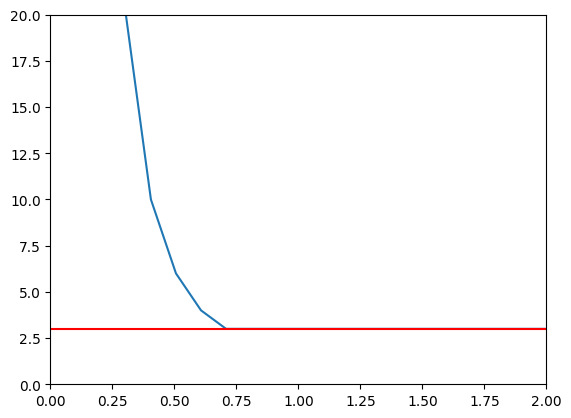

In [53]:
sns.lineplot(x = np.linspace(0.001, 10, 100), y = num_of_outliers);
plt.xlim(0,2);
plt.ylim(0,20);
# draw a horizontal line: hline
plt.hlines(y = 3, xmin = 0, xmax = 2.00, color = 'red');

It mean the model has performed poor for all the eps values after epsilon = 0.75. So, we should choose this.because on y-axis, epsilon = 0.75 is exactly equal to 3. which we already know that we have 3 outliers.

Let's confirm this.

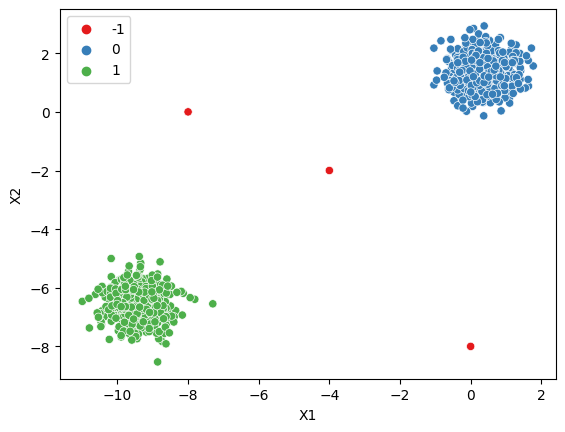

In [54]:
model =DBSCAN(eps=0.75)
display_categories(model, blobs_with_outliers);

Good performance.

Now, lets judge the min_points thing.

In [55]:
num_of_outliers = []
outliers_percent = []

for n in range(1,100):
  model = DBSCAN(min_samples=n)
  model.fit(blobs_with_outliers)

  num_of_outliers.append(np.sum(model.labels_ == -1))

  outliers_percent.append(100 * np.sum(model.labels_ == -1) / len(model.labels_))

<Axes: >

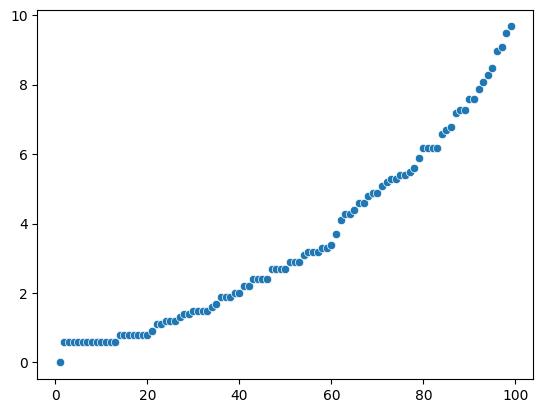

In [57]:
sns.scatterplot(x = np.arange(1,100), y = outliers_percent)

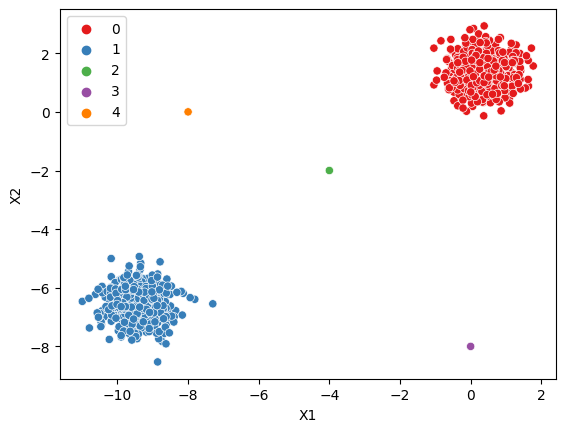

In [58]:
model =DBSCAN(eps=0.75, min_samples=1)
display_categories(model, blobs_with_outliers);